## Importing libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets     # 'datasets' contains iris dataset

## Importing dataset

In [82]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

## Exploring the dataset

In [48]:
data.head() # using head() and tail() to see the

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
data.tail() # first and last five rows respectively

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [23]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### initial observations:
#### 1. there are no null values, confirmed by is.na().any()
#### 2. petal length has high standard deviation, meaning values are relatively more spread apart

In [7]:
data.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

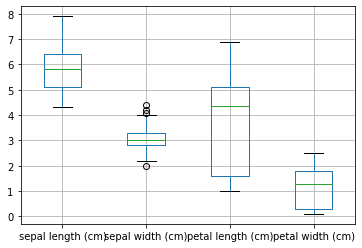

In [33]:
data.boxplot() #outliers in sepal width

### Removing outliers using inter-quartile range (IQR)

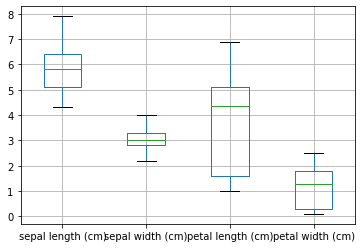

In [51]:
sep_mean = data['sepal width (cm)'].mean()   #3.05733
sep_med = data['sepal width (cm)'].median()   #3.0

# sep_mean, sep_med are similar so we can use either to REPLACE outlier values

for i in ['sepal width (cm)']: # loops through the specified column
    q75 = np.percentile(data['sepal width (cm)'],75) # calculating 75th 
    q25 = np.percentile(data['sepal width (cm)'],25) # and 25th percentiles
    iqr = q75-q25
    up_bound = q75+(1.5*iqr)  # setting upper and lower limits so as to 
    lwr_bound = q25-(1.5*iqr) # replace values that fall outside these limits
    
    data.loc[data[i]<lwr_bound,i] = sep_med # replacing outliers with mean/median instead of
    data.loc[data[i]>up_bound,i] = sep_med  # deleting rows entirely
    

data.boxplot() #no more outliers

### Determining the most suitable number of clusters

Text(0, 0.5, 'Within-cluster sum of squares')

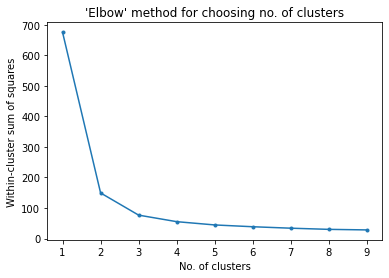

In [73]:
from sklearn.cluster import KMeans

x = data.values
ss = []

for k in range(1,10):
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(x)
    ss.append(km.inertia_)
plt.plot(range(1,10), ss, marker='.')
plt.title("'Elbow' method for choosing no. of clusters")
plt.xlabel("No. of clusters")
plt.ylabel("Within-cluster sum of squares")

### We now look at the graph and determine that 3 is the optimal number of clusters for this data as the drop in WCSS from cluster 3 onwards isn't significant

## Classifying using KMeans and visualizing results

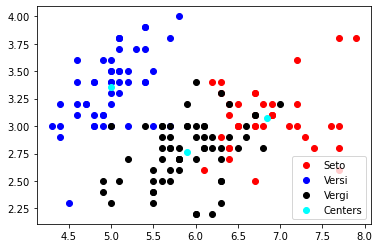

In [90]:
km = KMeans(n_clusters = 3, random_state = 0)
y = km.fit_predict(x)

plt.scatter(x[y == 0,0], x[y == 0,1], c = 'red', label = 'Seto')
plt.scatter(x[y == 1,0], x[y == 1,1], c = 'blue', label = 'Versi')
plt.scatter(x[y == 2,0], x[y == 2,1], c = 'black', label = 'Vergi')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = "cyan", label = "Centers")
plt.legend()
plt.show()